# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [42]:
# import packages 

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt




# Data File Reading Section
## Write code to read in data from external sources here

In [43]:
#read datasets

indiadf = pd.read_csv('data.csv')



/Users/karentafa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [44]:
# Your code for this section here ...

#Describe data
indiadf.describe()

#no. of total rows and columns

indiadf.shape

#no. of non-null values

indiadf.count()

#display data info

indiadf.info

#top 10

indiadf.head(10)

#bottom 10

indiadf.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,9/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/9/15
435733,SAMP,12/12/15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/12/15
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/15/15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/18/15
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/21/15
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/24/15
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,12/29/15
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [45]:
# Cleaning up the data

#dropping columns that aren't required

indiadf = indiadf.drop(columns=['stn_code','agency','sampling_date', 'location_monitoring_station']) # i dropped location_monitoring_station because it said 
#location_monitoring_agency does not exist

# dropping rows where no date is available

indiadf = indiadf.dropna(subset = ['date'])


In [46]:
# displaying final columns (data.columns)

indiadf.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [47]:
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

indiadf.type = indiadf.type.replace(types)

In [48]:
# Display top 10 records after codification of 'types'
# ... Your code here

indiadf.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,2/1/90
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,2/1/90
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,2/1/90
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,3/1/90
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,3/1/90
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,3/1/90
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,4/1/90
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,4/1/90
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,4/1/90
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,5/1/90


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [49]:

#convert to datetime

indiadf['date'] = pd.to_datetime(indiadf['date'])

indiadf['year']= indiadf['date'].dt.year

# Top 5 records
indiadf.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [50]:
# define columns of importance, which shall be used reguarly (COLS = ....)

important_columns = indiadf[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]


# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy

miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

miss_mean_imputer.fit(important_columns)
    
indiadf[['so2', 'no2', 'rspm', 'spm', 'pm2_5']] = miss_mean_imputer.transform(important_columns)


# Display data.info after the transformation
indiadf.info

# Display that there are no more missing values in the dataset

indiadf.isnull().sum()


state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [51]:
so2stat = indiadf.groupby(['state'])['so2'].median().sort_values(ascending=True)

so2stat



state
Nagaland                 2.000000
Mizoram                  2.000000
Meghalaya                2.000000
Arunachal Pradesh        2.500000
Himachal Pradesh         3.000000
Kerala                   4.200000
Telangana                5.000000
Odisha                   5.000000
Jammu & Kashmir          5.000000
Andhra Pradesh           5.000000
Goa                      6.000000
Rajasthan                6.300000
Delhi                    6.300000
Assam                    6.500000
Puducherry               7.266667
Daman & Diu              7.600000
Chandigarh               7.950000
West Bengal              8.000000
Dadra & Nagar Haveli     8.400000
Karnataka               10.000000
Uttar Pradesh           10.000000
Tamil Nadu              10.000000
Punjab                  10.300000
Manipur                 10.829428
Bihar                   10.829428
Haryana                 10.829428
Madhya Pradesh          10.829428
Chhattisgarh            12.500000
Maharashtra             13.000000
Gujarat 

(0.0, 1.0, 0.0, 1.0)

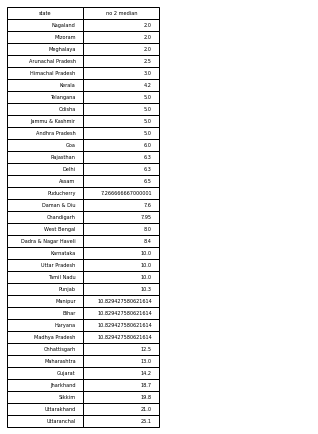

In [52]:
# as table
table = pd.DataFrame(so2stat)



table['index'] = np.arange(0, 34)

table = table.reset_index().set_index('index')




plt.figure()


plt.subplot(121)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

plt.table(cellText=cell_text, colLabels=['state','no 2 median'], loc='left')
plt.axis('off')




Text(0, 0.5, 'so2')

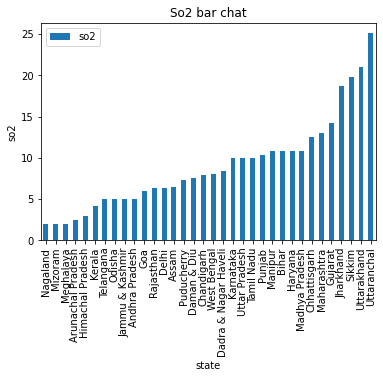

In [53]:
#as bar chart

table.plot.bar(x='state', y='so2', rot=0)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("So2 bar chat")
plt.xlabel("state")
plt.ylabel("so2")

### no2 status

Text(0, 0.5, 'no2')

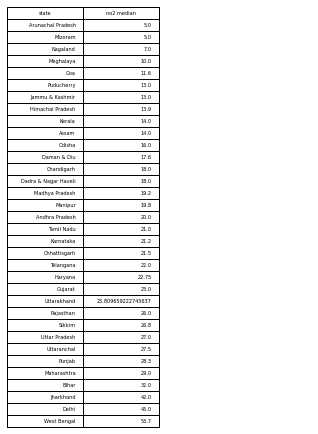

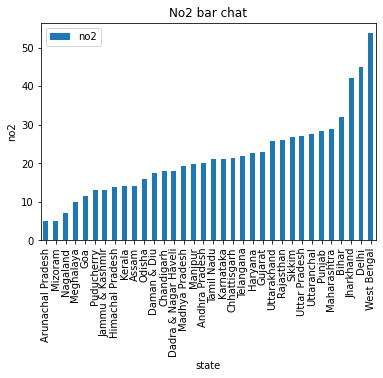

In [54]:
no2stat = indiadf.groupby(['state'])['no2'].median().sort_values(ascending=True)

# as table
table2 = pd.DataFrame(no2stat)



table2['index'] = np.arange(0, 34)

table2 = table2.reset_index().set_index('index')



plt.figure()

plt.subplot(121)

cell_text = []
for row in range(len(table2)):
    cell_text.append(table2.iloc[row])

plt.table(cellText=cell_text, colLabels=['state','no2 median'], loc='left')
plt.axis('off')

#as bar chart

table2.plot.bar(x='state', y='no2', rot=0)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("No2 bar chat")
plt.xlabel("state")
plt.ylabel("no2")




### rspm status

Text(0, 0.5, 'rspm')

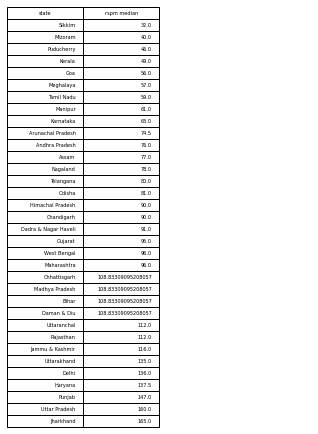

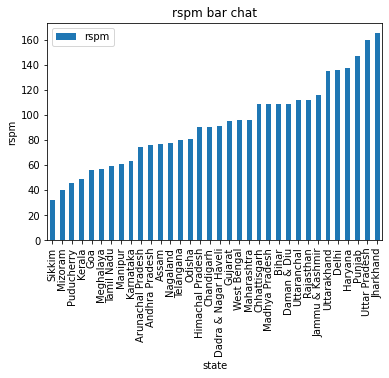

In [55]:
rspmstat = indiadf.groupby(['state'])['rspm'].median().sort_values(ascending=True)

# as table
table3 = pd.DataFrame(rspmstat)



table3['index'] = np.arange(0, 34)

table3 = table3.reset_index().set_index('index')



plt.figure()

plt.subplot(121)

cell_text = []
for row in range(len(table3)):
    cell_text.append(table3.iloc[row])

plt.table(cellText=cell_text, colLabels=['state','rspm median'], loc='left')
plt.axis('off')

#as bar chart

table3.plot.bar(x='state', y='rspm', rot=0)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("rspm bar chat")
plt.xlabel("state")
plt.ylabel("rspm")


### spm status

Text(0, 0.5, 'spm')

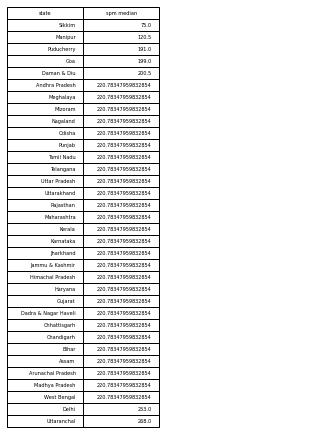

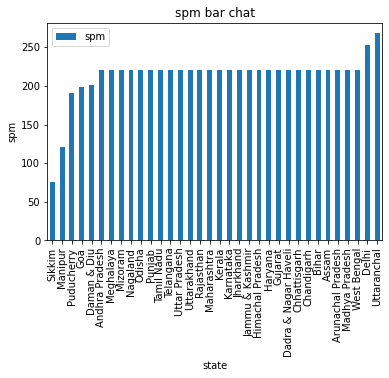

In [56]:
spmstat = indiadf.groupby(['state'])['spm'].median().sort_values(ascending=True)

# as table
table4 = pd.DataFrame(spmstat)



table4['index'] = np.arange(0, 34)

table4 = table4.reset_index().set_index('index')



plt.figure()

plt.subplot(121)

cell_text = []
for row in range(len(table4)):
    cell_text.append(table4.iloc[row])

plt.table(cellText=cell_text, colLabels=['state','spm median'], loc='left')
plt.axis('off')

#as bar chart

table4.plot.bar(x='state', y='spm', rot=0)
plt.xticks(rotation=90, horizontalalignment="center")
plt.title("spm bar chat")
plt.xlabel("state")
plt.ylabel("spm")

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [57]:
newdf= indiadf.loc[indiadf.state=='Andhra Pradesh',['no2', 'so2', 'rspm','spm','year']].groupby('year').median()
               
                
                
newdf.head(5)


,no2,so2,rspm,spm
year,,,,
1990,13.6,5.60,108.833091,179.00000
1991,12.8,8.25,108.833091,141.50000
1992,27.6,12.40,108.833091,192.00000
1993,11.4,6.00,108.833091,220.78348
1994,14.2,8.70,108.833091,220.78348


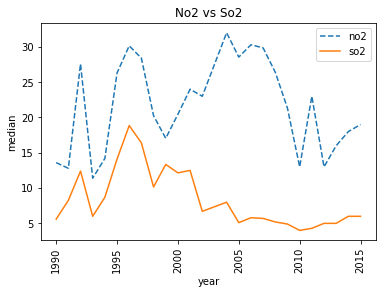

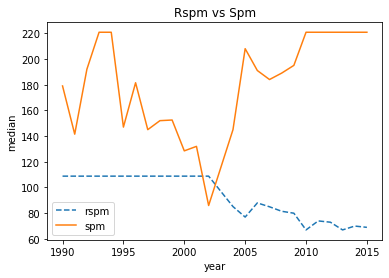

In [58]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.



#a)
plt.plot(newdf.index,newdf.no2, linestyle = '--')

plt.plot(newdf.index,newdf.so2, linestyle = '-')
plt.legend(['no2','so2'])
plt.title('No2 vs So2')
plt.xticks(rotation=90, horizontalalignment="center")
plt.xlabel('year', fontsize=10)
plt.ylabel('median', fontsize=10)
plt.show()



#b) 
 
plt.plot(newdf.index,newdf.rspm, linestyle = '--')
plt.plot(newdf.index,newdf.spm, linestyle = '-')
plt.legend(['rspm','spm'])
plt.title('Rspm vs Spm')
plt.xlabel('year', fontsize=10)
plt.ylabel('median', fontsize=10)
plt.show()




Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



In [ ]:
#Yes, the Suspended Particulate Matter has increased alarmingly ever since around 2002 and this is worrying for the state 
#because it means the air quality is deteriorating